# Life Expectancy by Country Dataset Analysis
The ["Country Life Expectancy"](https://www.kaggle.com/datasets/amirhosseinmirzaie/countries-life-expectancy/data) dataset (2848 x 18) provides population life expectancy and healthcare data for 178 countries from 2000 to 2015.
This notebook will perform EDA, answer specific statistical questions, and predict life expectatancy using a regression model.

Column descriptions: \
**Country:** \
Country under study	\
**Year:** \
year	\
**Population:** \
Status of the country's development	Status Population of country	\
**Hepatitis B:** \
Percentage of people finally one year old who were immunized against hepatitis B	\
**Measles:** \
The number of reported measles cases per 1000 people	\
**Polio:** \
Percentage of 1-year-olds immunized against polio	\
**Diphtheria:** \
Percentage of people finally one year old who were immunized against diphtheria	\
**HIV/AIDS:** \
The number of deaths caused by AIDS of the last 4-year-olds who were born alive per 1000 people	\
**infant deaths:** \
The number of infant deaths per 1000 people	\
**under-five deaths:** \
The number of deaths of people under 5 years old per 1000 people	\
**Total expenditure:** \
The ratio of government medical-health expenses to total government expenses in percentage	\
**GDP:** \
Gross domestic product	\
**BMI:** \
The average body mass index of the entire population of the country	\
**thinness 1-19 years:** \
Prevalence of thinness among people 19 years old in percentage	\
**Alcohol:** \
Liters of alcohol consumption among people over 15 years old	\
**Schooling:** \
The number of years that people study	\
**Life expectancy:** \
Country life expectancy	

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [476]:
# load dataset
df = pd.read_csv("../Data/life_expectancy.csv")
df = df.copy()
print(df.shape)
df.head()

(2848, 18)


,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


## Exploratory Data Analysis

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [478]:
df["Year"] = df["Year"].astype("category")
# df["Year"] = pd.to_datetime(df["Year"], format='')

In [479]:
df["Status"] = pd.get_dummies(df["Status"], drop_first=True)
# wherein Status==Developing is True
df.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,True,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,True,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,True,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,True,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,True,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [480]:
df.describe(include='object')

,Country
count,2848
unique,178
top,Afghanistan
freq,16


In [481]:
df.describe(include=(pd.DataFrame(df.dtypes)[0].tolist()))

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
count,2848,2848.0,2848,2.204000e+03,2306.000000,2848.000000,2829.000000,2829.000000,2848.000000,2848.000000,2848.000000,2627.000000,2406.000000,2816.000000,2816.000000,2660.000000,2688.000000,2848.000000
unique,178,16.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,2000.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,178.0,2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.283457e+07,81.076756,2083.082163,82.682220,82.451396,1.756461,28.359902,39.500000,5.935577,7664.398813,38.503374,4.847230,4.638932,12.060156,69.347402
std,NaN,NaN,NaN,6.196094e+07,25.019068,10249.107207,23.434954,23.693936,5.148935,117.188032,159.800866,2.504439,14466.241793,19.955485,4.443695,4.064721,3.320160,9.528332
min,NaN,NaN,NaN,3.400000e+01,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.370000,1.681350,1.000000,0.100000,0.010000,0.000000,36.300000
25%,NaN,NaN,NaN,1.967585e+05,77.000000,0.000000,78.000000,78.000000,0.100000,0.000000,0.000000,4.240000,477.541713,19.500000,1.600000,0.930000,10.200000,63.500000
50%,NaN,NaN,NaN,1.391756e+06,92.000000,16.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.760000,1841.086830,43.900000,3.300000,3.785000,12.400000,72.200000
75%,NaN,NaN,NaN,7.438947e+06,97.000000,336.750000,97.000000,97.000000,0.700000,20.000000,25.000000,7.530000,6265.658907,56.200000,7.125000,7.810000,14.300000,75.800000


### Visualise Data Distributions

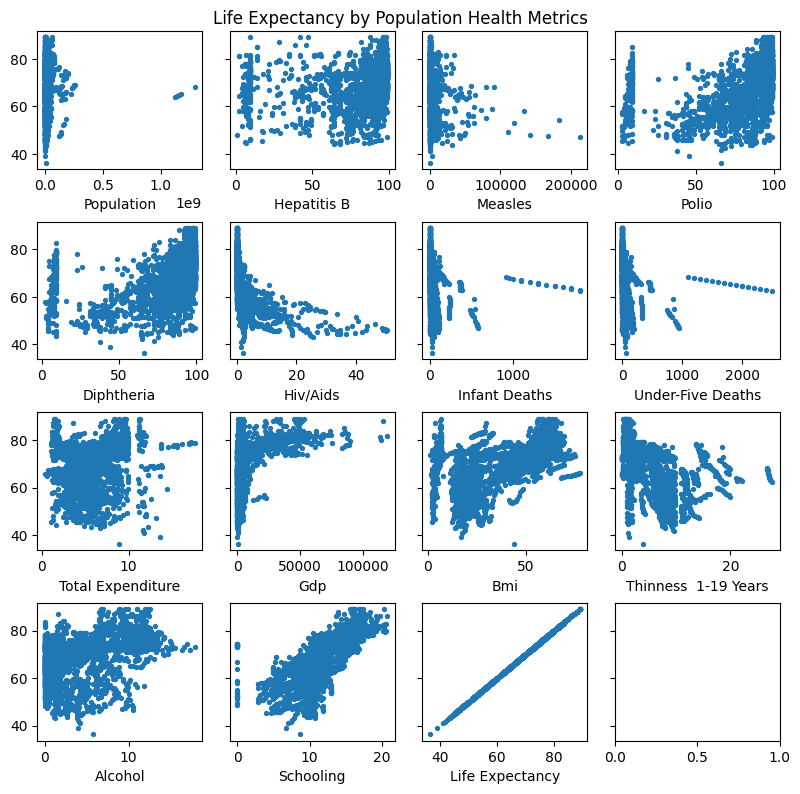

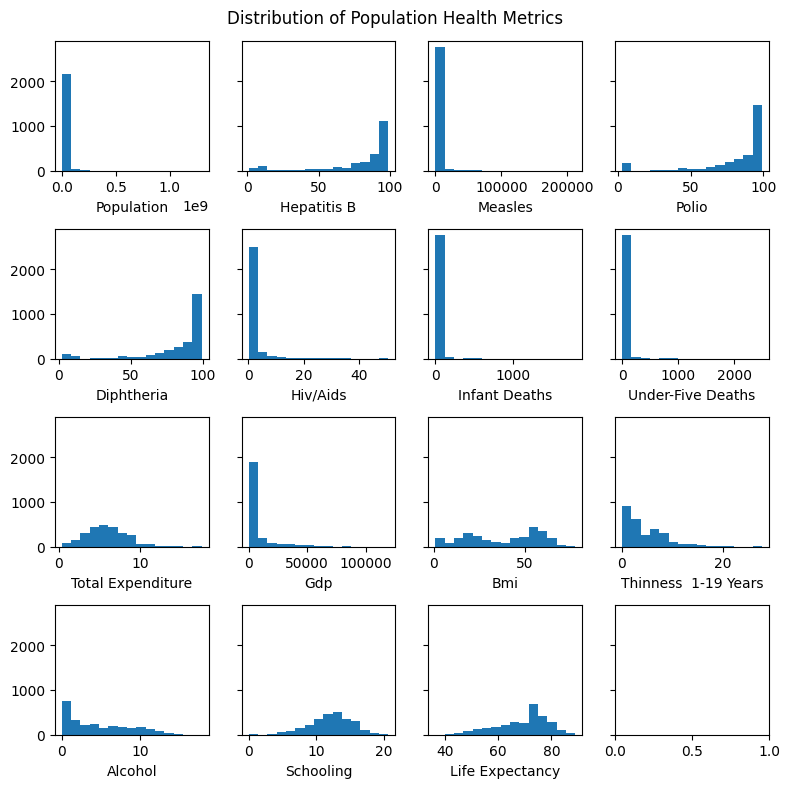

In [482]:
# visulaise distributions 
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig1, axs = plt.subplots(4, 4, sharey=True, figsize=(8,8))
fig1.suptitle("Life Expectancy by Population Health Metrics")
j=0
k=0
for i in num_cols:
    axs[j,k].scatter(df[i], df["Life expectancy"], s=8)
    axs[j,k].set_xlabel(i.title()) # use .set_xlabel, .set_ylabel so it stays to its subplot (.xlabel will only show for the last subplot)
    k+=1
    if k>3:
        k=0
        j+=1
    else:
        continue
plt.tight_layout(pad=0.7) # add padding bw plots
plt.show()


fig2, axs = plt.subplots(4, 4, sharey=True, figsize=(8,8))
fig2.suptitle("Distribution of Population Health Metrics")
j=0
k=0
for i in num_cols:
    axs[j,k].hist(df[i], bins=15)# df["Life expectancy"], s=8)
    axs[j,k].set_xlabel(i.title()) # use .set_xlabel, .set_ylabel so it stays to its subplot (.xlabel will only show for the last subplot)
    k+=1
    if k>3:
        k=0
        j+=1
    else:
        continue
plt.tight_layout() 
plt.show()


## Preprocessing

In [483]:
# remove rows lacking target data
df["Life expectancy"].isna().sum()
# no missing data

# target, feature separation
target = df["Life expectancy"]
features = df.drop(columns = ["Life expectancy"])

(2848, 17)
(2848, 17) after dropping cols missing 50%+ of data


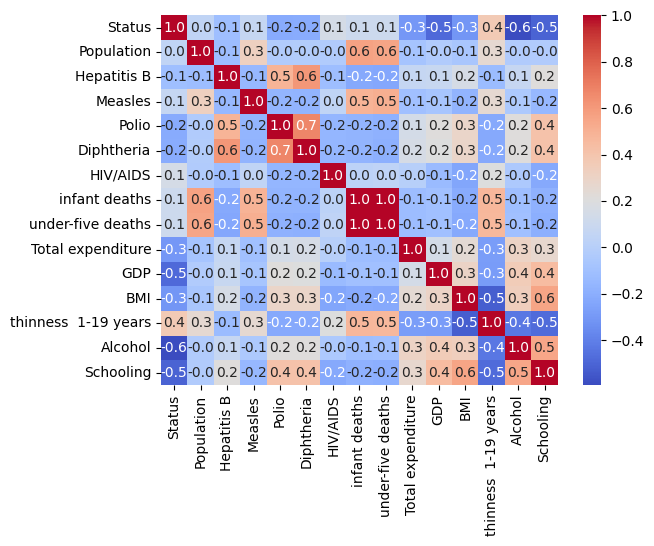

In [484]:
# preprocessing features
# drop cols missing >50% data
print(features.shape)
for col in features.columns:
    if pd.isnull(features[col]).sum() >= len(features[col])*.5:
        features = features.drop(columns=[col])
print(features.shape, "after dropping cols missing 50%+ of data")

# feature corr matrix, can remove redundant features
corr_matrix = features.select_dtypes(include=[np.number]).corr()
corr_matrix = features.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()


In [485]:
# delete redundant features
# determine highly correlated (redundant) features
threshold=0.65
corr_with_target = features.corrwith(target, numeric_only=True).abs()

hicorr_pairs = []
for i in range(0, len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
    # i, all cols against j, all cols excluding self and previously examined pairs  
        if abs(corr_matrix.iloc[i, j])>=threshold:
            col_i, col_j = corr_matrix.columns[i], corr_matrix.columns[j]
            hicorr_pairs.append((col_i, col_j, corr_matrix.iloc[i, j]))

# of 2 redundants, remove the one w lower correlation to the target 
worst_feature = []
if hicorr_pairs:
    for col_i, col_j, corr in hicorr_pairs:
        # feature w worst target corr in each high corr pair gets added to worst_feature list
        if (corr_with_target[col_i]) < (corr_with_target[col_j]):
            worst_feature.append(col_i)
        else:
            worst_feature.append(col_j)
    features = features.drop(columns=(set(worst_feature))) # each 'worst' feature only accessed once (in case of multiple entries) 

print("removed features", worst_feature)
print(features.shape, "after removing highly correlated features")

removed features ['Polio', 'infant deaths']
(2848, 15) after removing highly correlated features


## Train Test Split
### Post-split Preprocessing: Impute + Scale 

In [486]:
# split train test 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [487]:
# impute missing values 
def impute_na(data):
    """
    Iterates through all numeric columns in data to fill NAs.
    data: dataset 
    """
    for col in (data.select_dtypes(include=[np.number]).columns):
        # first try to impute w mean for that country
        means = data.groupby("Country")[col].mean()
        data[col]= data[col].fillna(data["Country"].map(means))
        # some countries have absolutely no data, so can then impute remaining NAs w median for the entire col
        data[col]= data[col].fillna(data[col].median())



    return data

In [ ]:
X_train = impute_na(X_train)
X_test = impute_na(X_test)
# confirm
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2278 entries, 942 to 860
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Country               2278 non-null   object  
 1   Year                  2278 non-null   category
 2   Status                2278 non-null   bool    
 3   Population            2278 non-null   float64 
 4   Hepatitis B           2278 non-null   float64 
 5   Measles               2278 non-null   int64   
 6   Diphtheria            2278 non-null   float64 
 7   HIV/AIDS              2278 non-null   float64 
 8   under-five deaths     2278 non-null   int64   
 9   Total expenditure     2278 non-null   float64 
 10  GDP                   2278 non-null   float64 
 11  BMI                   2278 non-null   float64 
 12  thinness  1-19 years  2278 non-null   float64 
 13  Alcohol               2278 non-null   float64 
 14  Schooling             2278 non-null   float64 
dtypes: bool(

In [489]:
# can drop Country and Year cols, are moreso identifiers for humans and not actual metrics we'd want the model using
def drop_id_cols(data):
    data = data.drop(columns=["Country", "Year"])
    return data
X_train = drop_id_cols(X_train)
X_test = drop_id_cols(X_test)

In [490]:
# standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build + Execute Regression Models

In [ ]:
# instantiate model options
models = [LinearRegression(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          ExtraTreesRegressor()
          ]

# GridSearchCV for hyperparameter tuning
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model}, r2: {r2}")

Model: LinearRegression(), r2: 0.7710793616010276
Model: RandomForestRegressor(), r2: 0.9534063786068069
Model: GradientBoostingRegressor(), r2: 0.9081775724324863
Model: ExtraTreesRegressor(), r2: 0.9609629704146359


In [497]:
model = RandomForestRegressor()
param_grid={
    'n_estimators': [100,200,300],
    'max_depth': [5,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 7],
    'max_features':['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Params: {grid_search.best_params_}, Best r2 score: {grid_search.best_score_}")


Best Params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, Best r2 score: 0.928658124123053


In [ ]:
model = GradientBoostingRegressor() 
param_grid = {
    'learning_rate':[0.1, 0.01, 1],
    'n_estimators': [200, 400],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Params: {grid_search.best_params_}, Best r2 score: {grid_search.best_score_}")


Best Params: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}, Best r2 score: 0.9437847339837294


In [496]:
model = ExtraTreesRegressor()
param_grid = {
    'n_estimators': [100,200,400],
    'max_depth':[None, 5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf':[1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}

grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Params: {grid_search.best_params_}, Best r2 score: {grid_search.best_score_}")


Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}, Best r2 score: 0.9431345744168202


Although the grid search reveled optimised parameters for the GradientBooster model, improving its r2 score by ~4%, the default parameters performed best for both the Random Forest and Extra Trees regressors.

### Model Performance: 
### - Predicted vs True Values, & 
### - Predicted vs Residuals

In [543]:
# following the class build by pkdarabi https://www.kaggle.com/code/pkdarabi/forecasting-life-expectancy-by-regression-models/notebook

def plot_comparison(model, X_train=X_train, X_test=X_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model} Model, mse: {mse}, r2: {r2}")



    fig, axs = plt.subplots(1, 2, figsize=(12,5))

    # plot pred v true
    # sns.regplot() = regression plot
    sns.regplot(x=y_test, y=y_pred, ax=axs[0])
    # plot random line
    axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
    axs[0].set_xlabel('True Life Expectancy (years)')
    axs[0].set_ylabel('Predicted Life Expectancy (years)')
    axs[0].set_title("Predicted vs True Life Expectancy")
    axs[0].grid(color='lightgray')

    # plot residuals vs predicted value
    residuals = y_test - y_pred
    sns.residplot(x=y_pred, y=residuals, ax=axs[1])
    axs[1].plot([y_test.min(), y_test.max()], [0,0])
    axs[1].set_xlabel('Predicted Life Expectancy')
    axs[1].set_ylabel('Residuals')
    axs[1].set_title("Residual Plot")
    axs[1].grid(color='lightgray')

    fig.suptitle(f'Predicted Life Expectancy by {model}')
    plt.show()

LinearRegression() Model, mse: 12.330097393006483, r2: 0.8626471291622364


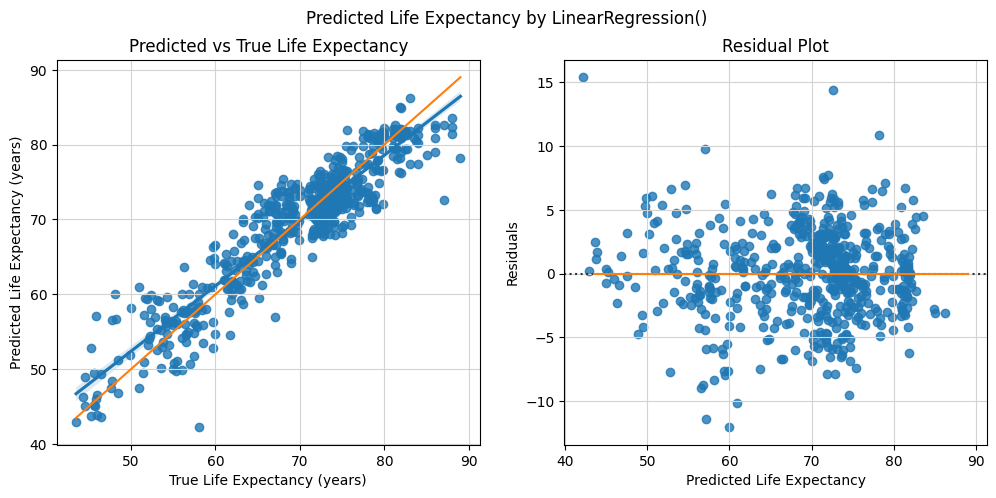

In [544]:
# linear regression
linreg = LinearRegression()

poly_transf = PolynomialFeatures(degree=2) 
X_train_polyt = poly_transf.fit_transform(X_train)
X_test_polyt = poly_transf.transform(X_test)

plot_comparison(linreg, X_train = X_train_polyt, X_test=X_test_polyt)

RandomForestRegressor() Model, mse: 4.342887047368423, r2: 0.9516217930266694


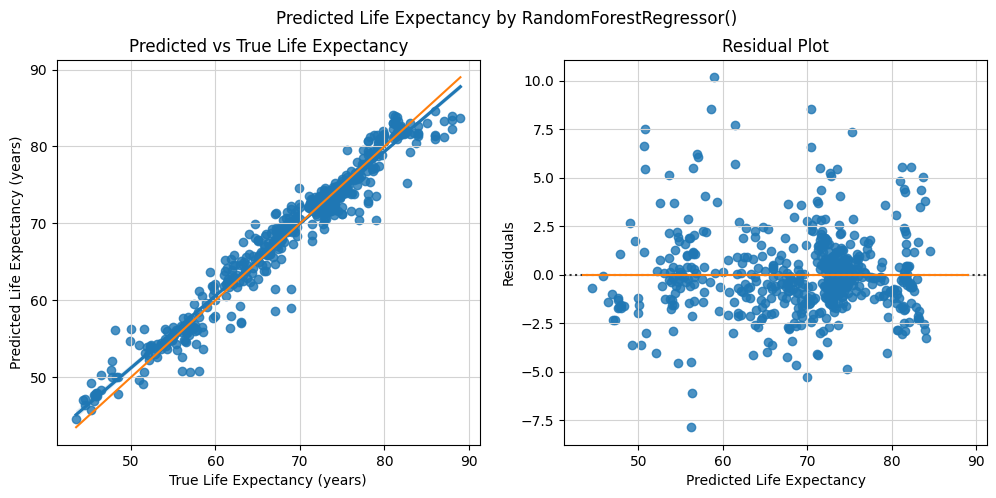

In [545]:
rand_for = RandomForestRegressor()
plot_comparison(rand_for)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=5, n_estimators=200) Model, mse: 4.22577402686037, r2: 0.9529263901491858


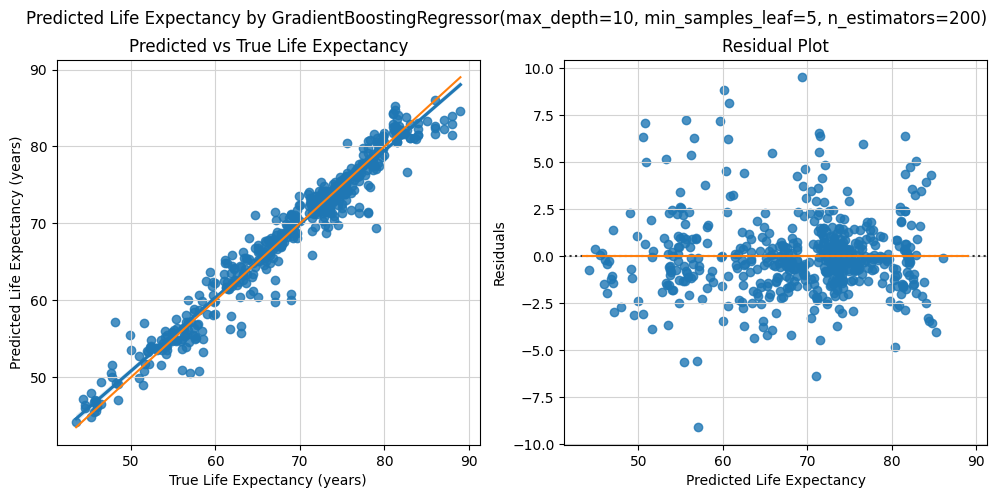

In [546]:
grad_boos = GradientBoostingRegressor(learning_rate= 0.1, loss= 'squared_error', max_depth= 10, min_samples_leaf= 5, 
                                      min_samples_split= 2, n_estimators= 200)
plot_comparison(grad_boos)

ExtraTreesRegressor() Model, mse: 3.4995463649122853, r2: 0.9610163063169966


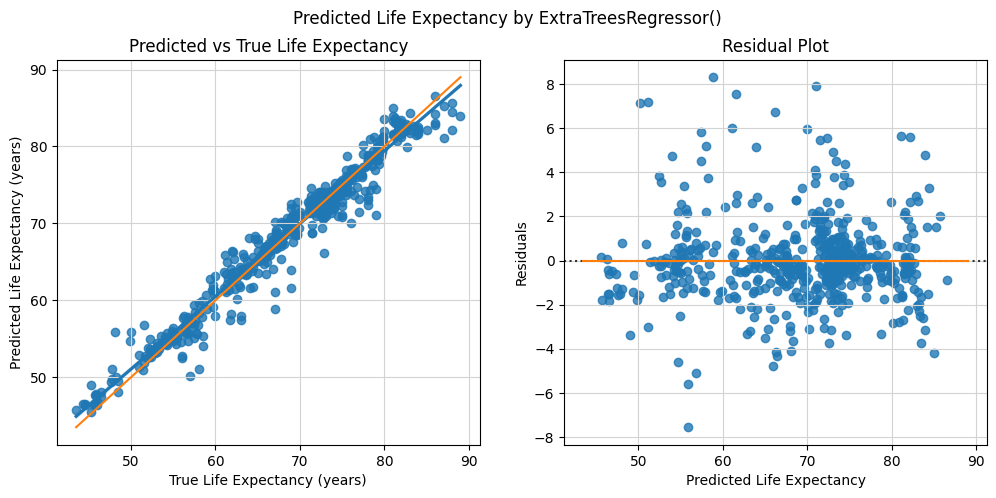

In [547]:
ex_trees_reg = ExtraTreesRegressor()
plot_comparison(ex_trees_reg)

## Results

Although the **ExtraTreesRegressor** performs the best at r2=96% and with the smallest mse of 3.5, the GradientBooster and RandomForest are close seconds. \
Meanwhile, the simple LinearRegression model performs poorer by ~10%, with an mse almost triple the mse of other models at 12.3. This is evident in its residuals reaching 15 points of inaccuracy while the other models reach extremes of only 10 points.

Overall, the ExtraTreesRegressor in its default settings is the best performing regressor for this notebook.